In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit

In [4]:
fdg = np.loadtxt('/home/mabitbol/GBT-S140/externaldata/fd_G107_wim.dat')

In [5]:
cfs = fdg[:, 0]
cjys = fdg[:, 1]
cerrs = fdg[:, 2]
cfit = fdg[:, 3]
crem = fdg[:, 4]
cremerr = fdg[:, 5]

In [6]:
freqs = np.logspace(8, 13, 2000)
nu = freqs*1.e-9

In [7]:
beam = pi*(1.*pi/180.)**2
beam2 = pi*((0.16/60.)*pi/180.)**2

In [8]:
def freefreep(freqs, EM=100., Te=8000.):
    nu = freqs*1.e-9
    gff = np.log(4.955e-2 / nu) + 1.5 * np.log(Te)
    tff = 3.014e-2 * (Te**-1.5) * (nu**-2) * EM * gff
    return Te * (1. - np.exp(-tff))

In [9]:
def signal(freqs, EM, Ad, Bd, Asd, nup, A):
    fffit = freefreep(freqs, EM=EM, Te=8000.)
    fffit = fg.krj_to_radiance(freqs, fffit)*1.e26*beam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    dustfit = fg.krj_to_radiance(freqs, dustfit)*1.e26*beam
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9)
    amefit = fg.krj_to_radiance(freqs, amefit)*1.e26*beam
    ccmb = fg.cmb(freqs, A=A)
    ccmb = fg.krj_to_radiance(freqs, ccmb)*1.e26*beam
    total = fffit + dustfit + amefit + ccmb
    return total

In [10]:
def signal2(freqs, EM1, EM2, Ad, Bd):
    fffit = freefreep(freqs, EM=EM1, Te=8000.)
    fffit = fg.krj_to_radiance(freqs, fffit)*1.e26*beam
    fffit2 = freefreep(freqs, EM=EM2, Te=8000.)
    fffit2 = fg.krj_to_radiance(freqs, fffit2)*1.e26*beam2
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    dustfit = fg.krj_to_radiance(freqs, dustfit)*1.e26*beam
    return fffit + fffit2 + dustfit

In [11]:
def signal3(freqs, EM1, EM2, Ad, Bd, Te):
    fffit = freefreep(freqs, EM=EM1, Te=8000.)
    fffit = fg.krj_to_radiance(freqs, fffit)*1.e26*beam
    fffit2 = freefreep(freqs, EM=EM2, Te=Te)
    fffit2 = fg.krj_to_radiance(freqs, fffit2)*1.e26*beam2
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    dustfit = fg.krj_to_radiance(freqs, dustfit)*1.e26*beam
    return fffit + fffit2 + dustfit

In [12]:
pn = np.array([200., 80.e-5, 2., 1.e-3, 20.e9, 30.e-6])
x = curve_fit(signal, cfs*1.e9, cjys, p0=pn, sigma=cerrs, absolute_sigma=True)
pfit = x[0]

In [13]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2.])
y = curve_fit(signal2, cfs*1.e9, cjys, p0=pn2, sigma=cerrs, absolute_sigma=True)
pfit2 = y[0]

In [14]:
nfreqs = [4.575, 5.625, 6.125, 7.175]
newdata = [ 34.6409529, 35.52669743, 37.08009918, 36.56521972]

In [15]:
nfreqs = [4.575, 5.625, 6.125]
newdata = [ 34.6409529, 35.52669743, 37.08009918]

In [16]:
bigfs = np.concatenate([cfs, np.array(nfreqs)])

In [17]:
bigdata = np.concatenate([cjys, np.array(newdata)])

In [40]:
bigerrs = np.concatenate([cerrs, np.array(newdata)*0.2])

In [41]:
pn = np.array([200., 80.e-5, 2., 1.e-3, 20.e9, 30.e-6])
x = curve_fit(signal, bigfs*1.e9, bigdata, p0=pn, sigma=bigerrs, absolute_sigma=True)
pfit3 = x[0]

In [42]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2.])
y = curve_fit(signal2, bigfs*1.e9, bigdata, p0=pn2, sigma=bigerrs, absolute_sigma=True)
pfit4 = y[0]

In [43]:
pfit3

array([  3.15490959e+02,   6.27304865e-04,   2.23790342e+00,
         7.92180022e-04,   2.86714860e+10,   6.91390603e-05])

In [44]:
pfit4

array([  1.68596855e+02,   4.63902358e+07,   6.58789466e-04,
         2.20301922e+00])

In [45]:
xerrs = []
for k in range(6):
    xerrs.append(np.sqrt(x[1][k,k]))

In [46]:
yerrs = []
for k in range(4):
    yerrs.append(np.sqrt(y[1][k,k]))

In [47]:
xerrs / x[0]

array([ 0.11400131,  0.18953952,  0.05923384,  0.42458716,  0.17270326,
        0.59226732])

In [48]:
yerrs / y[0]

array([ 0.28521341,  0.19157071,  0.16927605,  0.05434024])

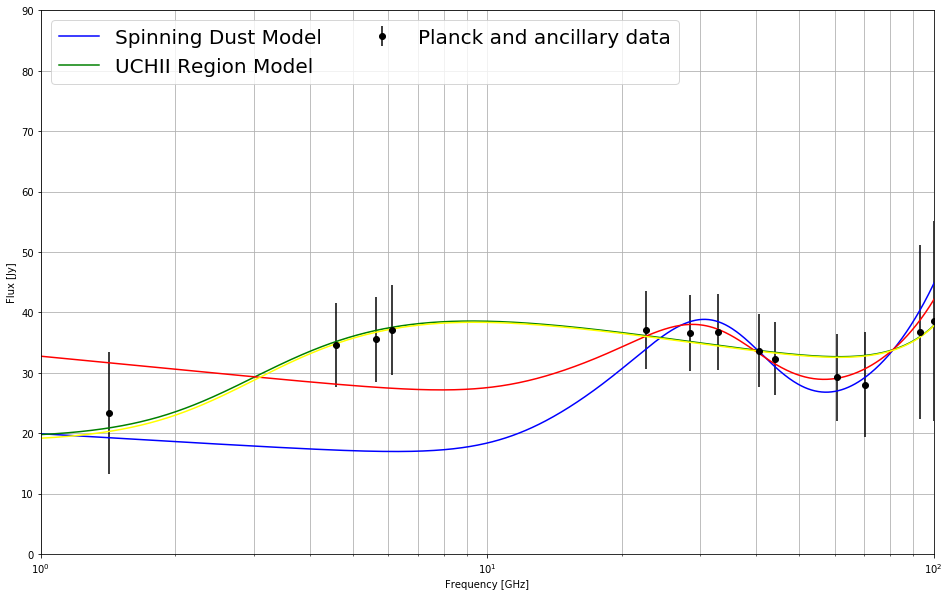

In [49]:
figure(figsize=(16,10))
plot(nu, signal(freqs, *pfit), 'b', label='Spinning Dust Model')
plot(nu, signal2(freqs, *pfit2), 'g', label='UCHII Region Model')
plot(nu, signal(freqs, *pfit3), 'r')
plot(nu, signal2(freqs, *pfit4), 'yellow')
errorbar(bigfs, bigdata, yerr=bigerrs, fmt='ko', label='Planck and ancillary data')

xscale('log')
ylim([0, 90])
xlim([1, 100])
#yscale('log')
xlabel('Frequency [GHz]')
ylabel('Flux [Jy]')
legend(loc=2, ncol=2, fontsize=20)
grid()
grid(which='minor')